In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.compat import StringIO
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
with open('./HT_Sensor_dataset.dat') as dataFile:
    file_data_raw = pd.read_csv(dataFile, sep="\s+")
    
with open('./HT_Sensor_metadata.dat') as dataFile:
    file_metadata_raw = pd.read_csv(dataFile, sep="\s+")

In [3]:
print(file_data_raw.head())
print(file_metadata_raw.head())

   id      time       R1       R2       R3       R4       R5       R6  \
0   0 -0.999750  12.8621  10.3683  10.4383  11.6699  13.4931  13.3423   
1   0 -0.999472  12.8617  10.3682  10.4375  11.6697  13.4927  13.3412   
2   0 -0.999194  12.8607  10.3686  10.4370  11.6696  13.4924  13.3405   
3   0 -0.998916  12.8602  10.3686  10.4370  11.6697  13.4921  13.3398   
4   0 -0.998627  12.8595  10.3688  10.4374  11.6699  13.4919  13.3390   

        R7       R8    Temp.  Humidity  
0  8.04169  8.73901  26.2257   59.0528  
1  8.04133  8.73908  26.2308   59.0299  
2  8.04101  8.73915  26.2365   59.0093  
3  8.04086  8.73936  26.2416   58.9905  
4  8.04087  8.73986  26.2462   58.9736  
   id      date   class     t0    dt
0   0  07-04-15  banana  13.49  1.64
1   1  07-05-15    wine  19.61  0.54
2   2  07-06-15    wine  19.99  0.66
3   3  07-09-15  banana   6.49  0.72
4   4  07-09-15    wine  20.07  0.53


In [4]:
data_raw = pd.merge(file_data_raw, file_metadata_raw, left_on='id', right_on='id')
data_raw.set_index("id", inplace=True)

In [5]:
data_raw.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928991 entries, 0 to 99
Data columns (total 15 columns):
time        928991 non-null float64
R1          928991 non-null float64
R2          928991 non-null float64
R3          928991 non-null float64
R4          928991 non-null float64
R5          928991 non-null float64
R6          928991 non-null float64
R7          928991 non-null float64
R8          928991 non-null float64
Temp.       928991 non-null float64
Humidity    928991 non-null float64
date        928991 non-null object
class       928991 non-null object
t0          928991 non-null float64
dt          928991 non-null float64
dtypes: float64(13), object(2)
memory usage: 213.0 MB


In [6]:
data_raw.describe()

,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,t0,dt
count,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000,928991.000000
mean,0.403261,12.185350,8.958396,8.945006,10.130319,15.154167,16.052371,5.390618,5.912815,27.283373,57.568023,13.052482,0.819034
std,0.859865,0.868116,1.558196,1.748622,1.711879,18.391606,3.303089,2.889244,3.304284,0.904537,4.821784,4.768272,0.471101
min,-0.999999,5.431460,1.820660,1.626900,2.282920,1.901290,5.587950,1.220370,1.430530,24.434400,44.660400,5.620000,0.120000
25%,-0.320817,11.980000,8.298835,8.273455,9.347275,10.244600,14.780400,4.430490,4.877900,26.764900,53.938100,8.170000,0.490000
50%,0.366136,12.404700,9.462680,9.564520,10.651800,11.683500,16.521200,5.389800,5.799340,27.328400,57.180800,13.370000,0.680000
75%,1.055152,12.715500,10.095900,10.207900,11.400000,13.784400,17.353100,5.989300,6.585930,27.868700,60.563500,16.380000,0.950000
max,3.309882,13.733300,11.315500,11.374200,12.754800,378.750000,73.817800,102.575000,99.888100,30.325400,77.680500,23.620000,2.310000


In [7]:
data = data_raw.rename(columns={"time": "Time", 
                 "Temp.": "Temperature", 
                 "date" : "Date", 
                 "class" : "Class", 
                 "t0" : "Start_Time",
                 "dt" : "Duration"})

count    928991.000000
mean          1.030654
std           0.791195
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: Class, dtype: float64

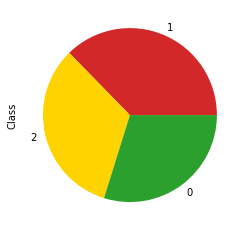

In [8]:
background_color = "#2ca02c"
wine_color = "#d32829"
banana_color = "#ffd300"

class_map = {"background":0, "wine":1, "banana":2}
class_colors = [background_color, wine_color, banana_color]
class_colors_map = {0:background_color, 1:wine_color, 2:banana_color}

data["Class"].replace(class_map, inplace=True)
data["Class"].value_counts().plot.pie(colors=[wine_color, banana_color, background_color])
data["Class"].describe()

Text(0, 0.5, '%')

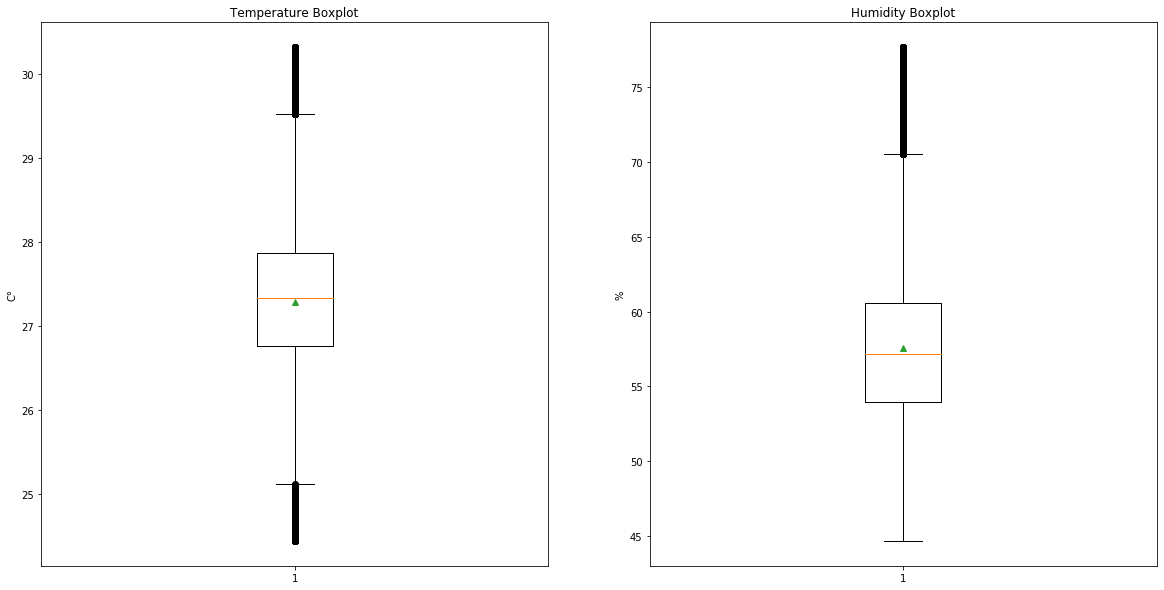

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 10))


axes[0].boxplot(data["Temperature"], showmeans=True)
axes[1].boxplot(data["Humidity"], showmeans=True)
   
axes[0].set_title("Temperature Boxplot")
axes[1].set_title("Humidity Boxplot")
axes[0].set_ylabel("C°")
axes[1].set_ylabel("%")

In [10]:
#_ = data.groupby(["Class", "Temperature"]).size().unstack("Class").plot.bar(stacked=True, color=class_colors, figsize=(15,5))

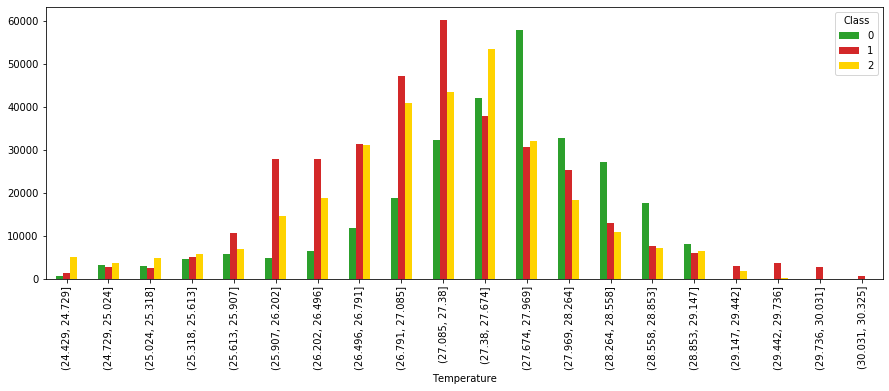

In [11]:
_ = data.groupby([pd.cut(data["Temperature"], bins=20), "Class"]).size().unstack("Class").plot.bar(stacked=False, color=class_colors, figsize=(15,5))

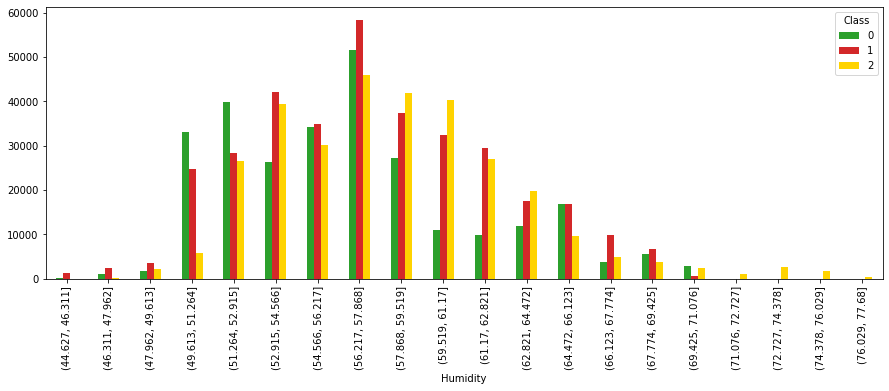

In [12]:
_ = data.groupby([pd.cut(data["Humidity"], bins=20), "Class"]).size().unstack("Class").plot.bar(stacked=False, color=class_colors, figsize=(15,5))

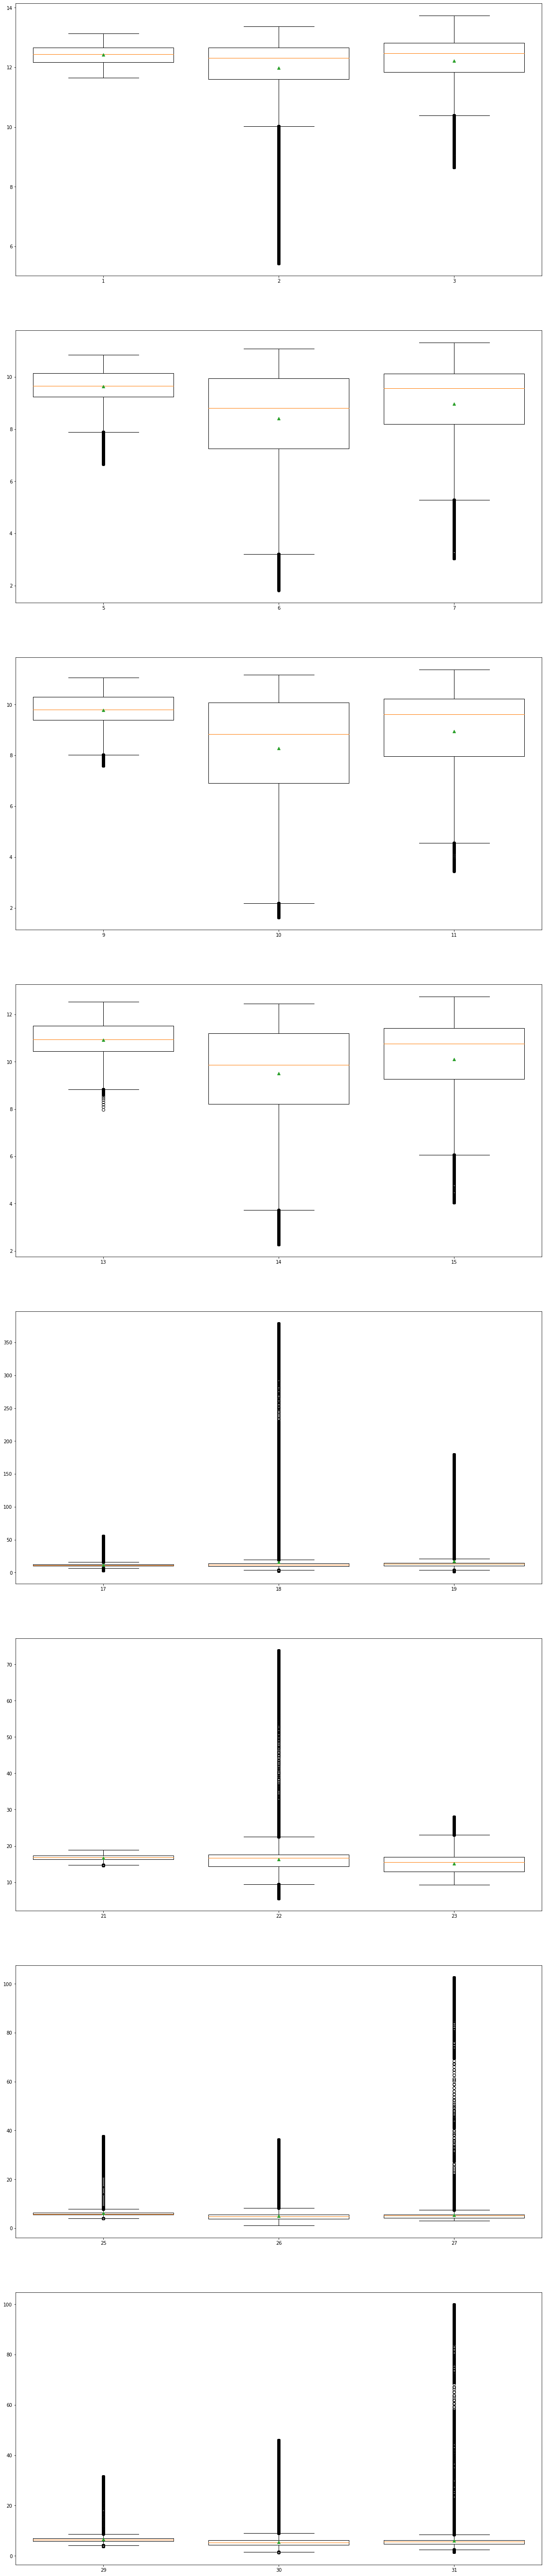

In [13]:

#ax.set_xticklabels(measures_feature_names)
#_ = ax.set_xticks(np.linspace(1.5, 2.9 * 15, 15))

fig, axes = plt.subplots(nrows=8, ncols=1, sharex=False, sharey=False, figsize=(20, 100))
j = 1

for i in range(1, 9):
    back = data[data["Class"] == 0]["R{}".format(i)]
    wine = data[data["Class"] == 1]["R{}".format(i)]
    bana = data[data["Class"] == 2]["R{}".format(i)]
    axes[i - 1].boxplot([back, wine, bana], positions = [j,j + 1, j + 2], showmeans=True, widths = 0.8)
    j += 4

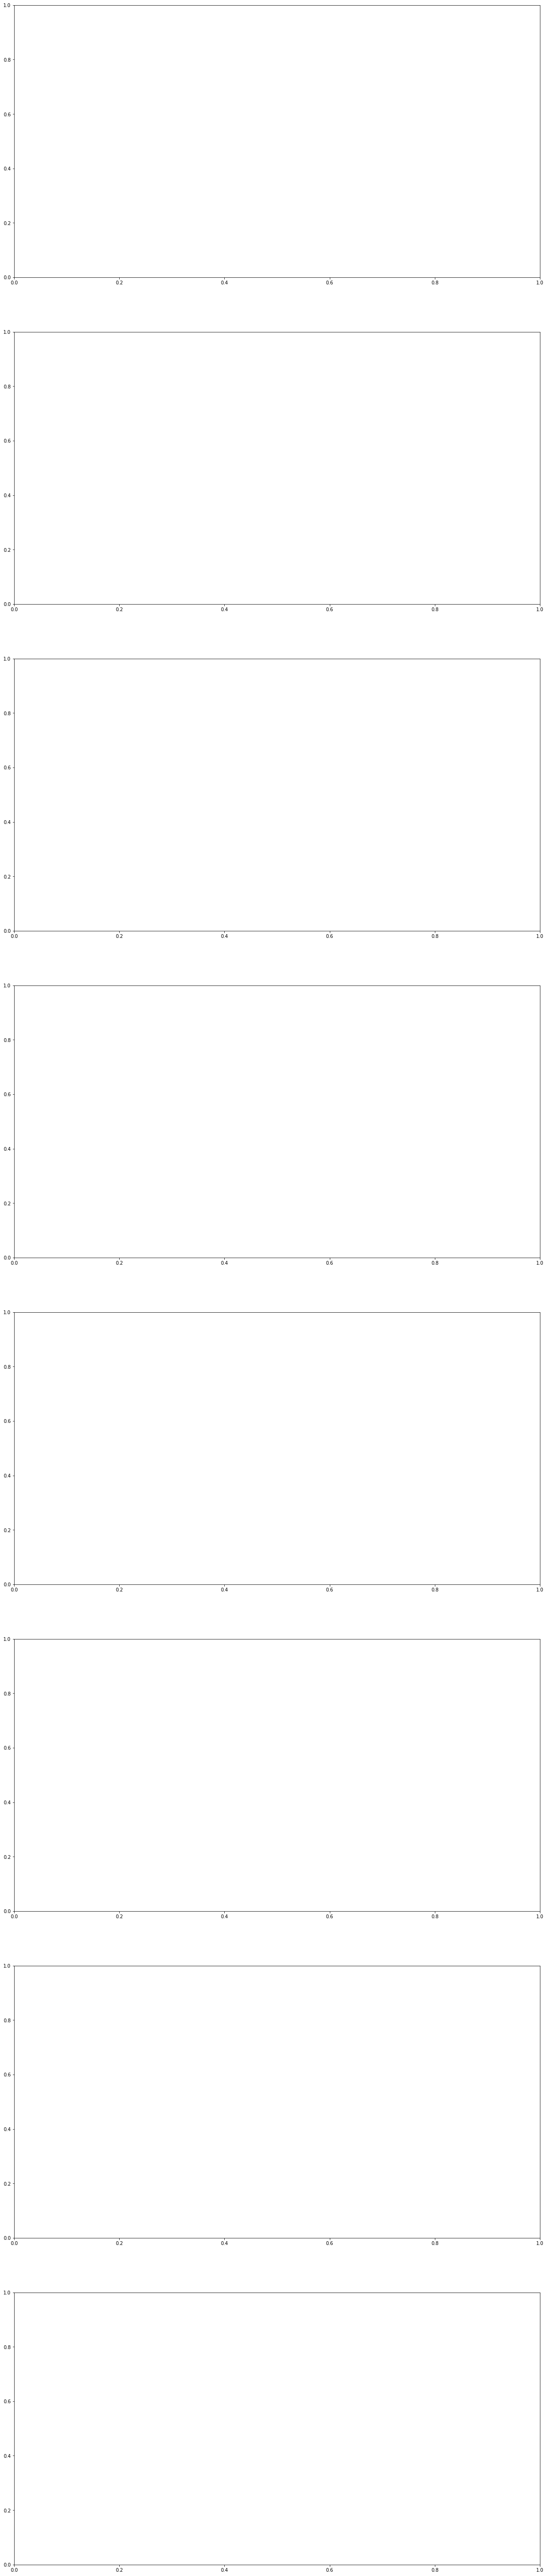

In [14]:
fig, axes = plt.subplots(nrows=8, ncols=1, sharex=False, sharey=False, figsize=(20, 100))
sample = data.sample(20000)

#for i in range(1, 9):
    #axes[i - 1].scatter(sample["Time"], sample["R{}".format(i)], c=sample["Class"].map(class_colors_map))

In [15]:
#data["Date"] = data["Date"].astype("datetime64")
#plt.plot(data["Date"])

In [16]:
#data.iloc[12810:21730]

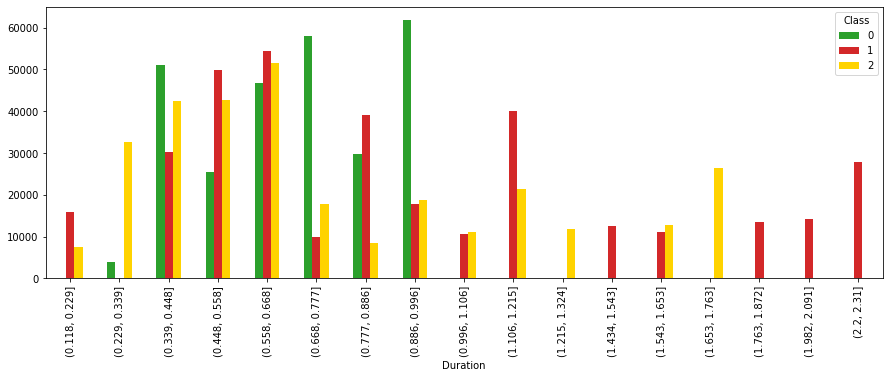

In [17]:
_ = data.groupby([pd.cut(data["Duration"], bins=20), "Class"]).size().unstack("Class").plot.bar(stacked=False, color=class_colors, figsize=(15,5))

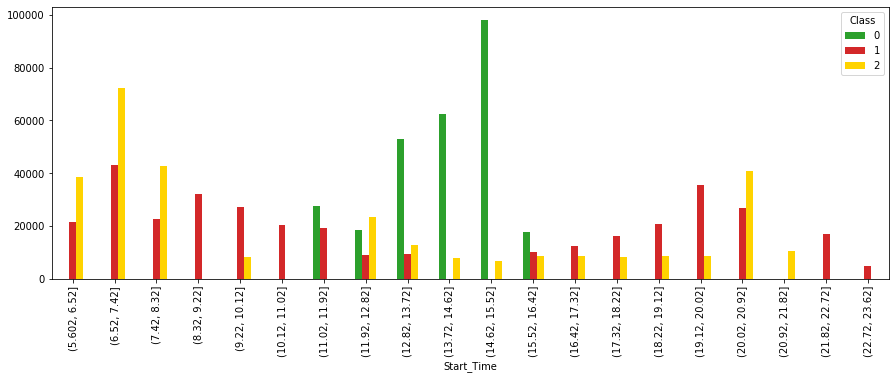

In [18]:
_ = data.groupby([pd.cut(data["Start_Time"], bins=20), "Class"]).size().unstack("Class").plot.bar(stacked=False, color=class_colors, figsize=(15,5))

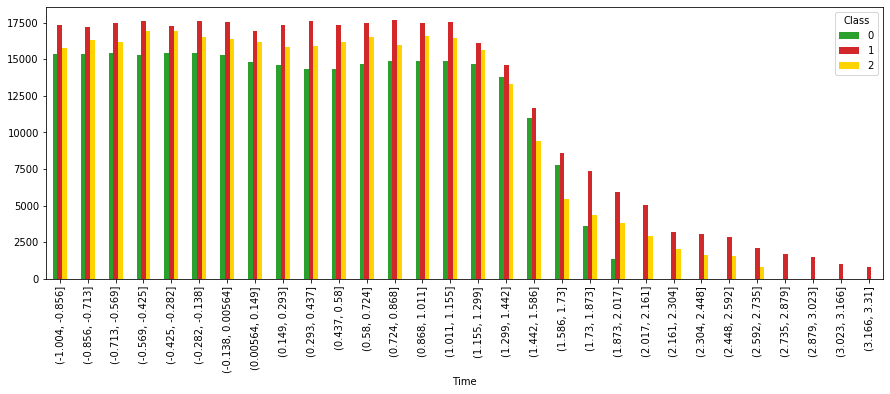

In [19]:
_ = data.groupby([pd.cut(data["Time"], bins=30), "Class"]).size().unstack("Class").plot.bar(stacked=False, color=class_colors, figsize=(15,5))

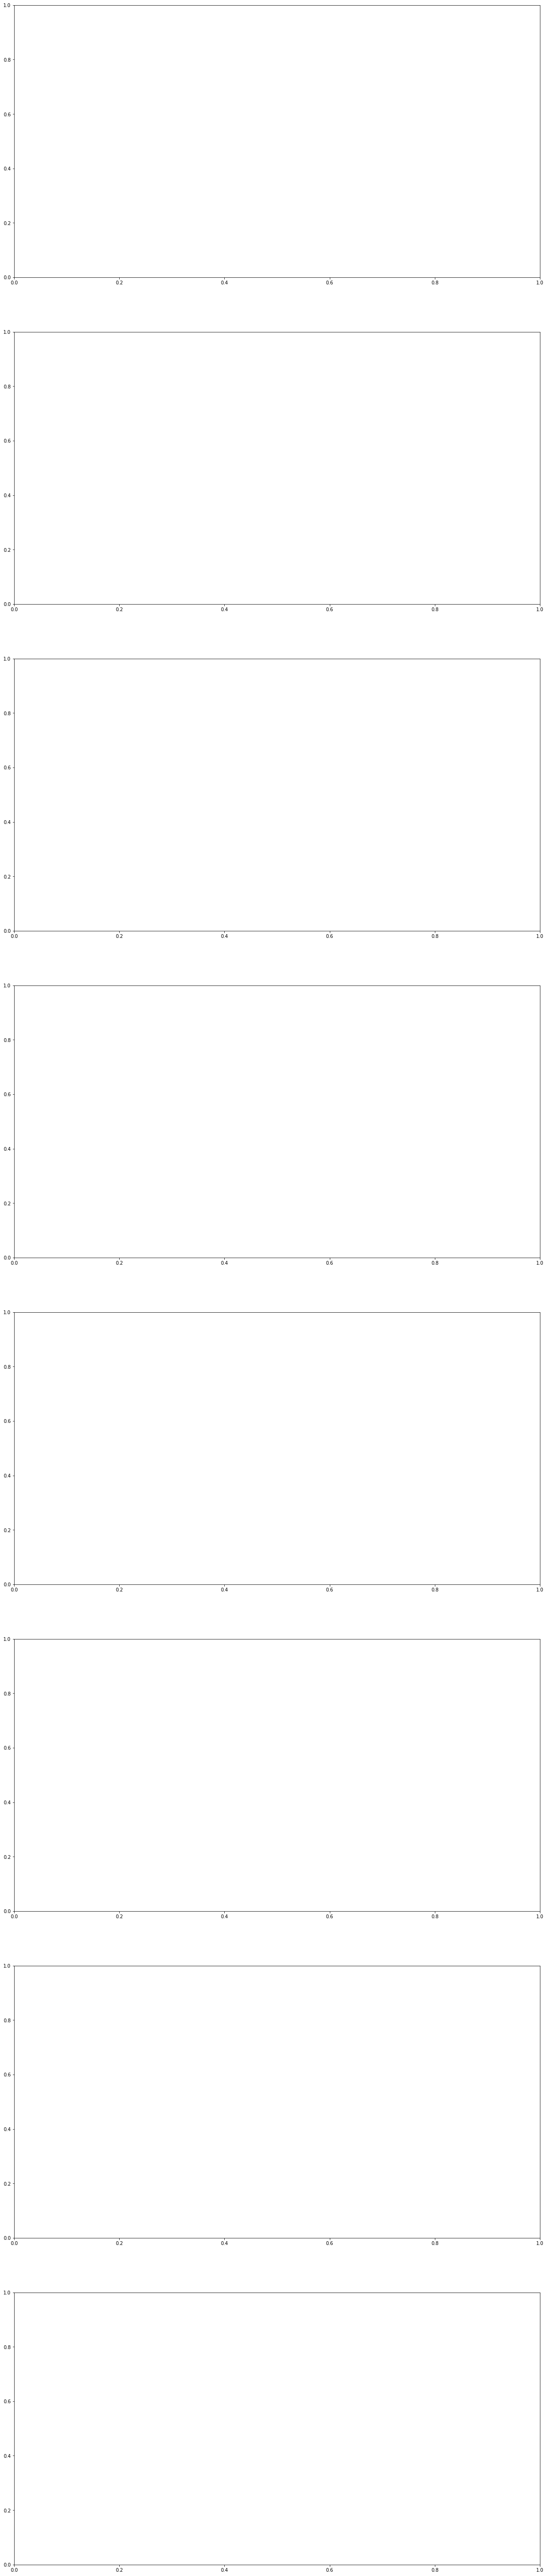

In [20]:
data_positive = data[data["Time"] > 1.5]
fig, axes = plt.subplots(nrows=8, ncols=1, sharex=False, sharey=False, figsize=(20, 100))
sample = data_positive.sample(10000)

#for i in range(1, 9):
    #axes[i - 1].scatter(sample["Time"], sample["R{}".format(i)], c=sample["Class"].map(class_colors_map))

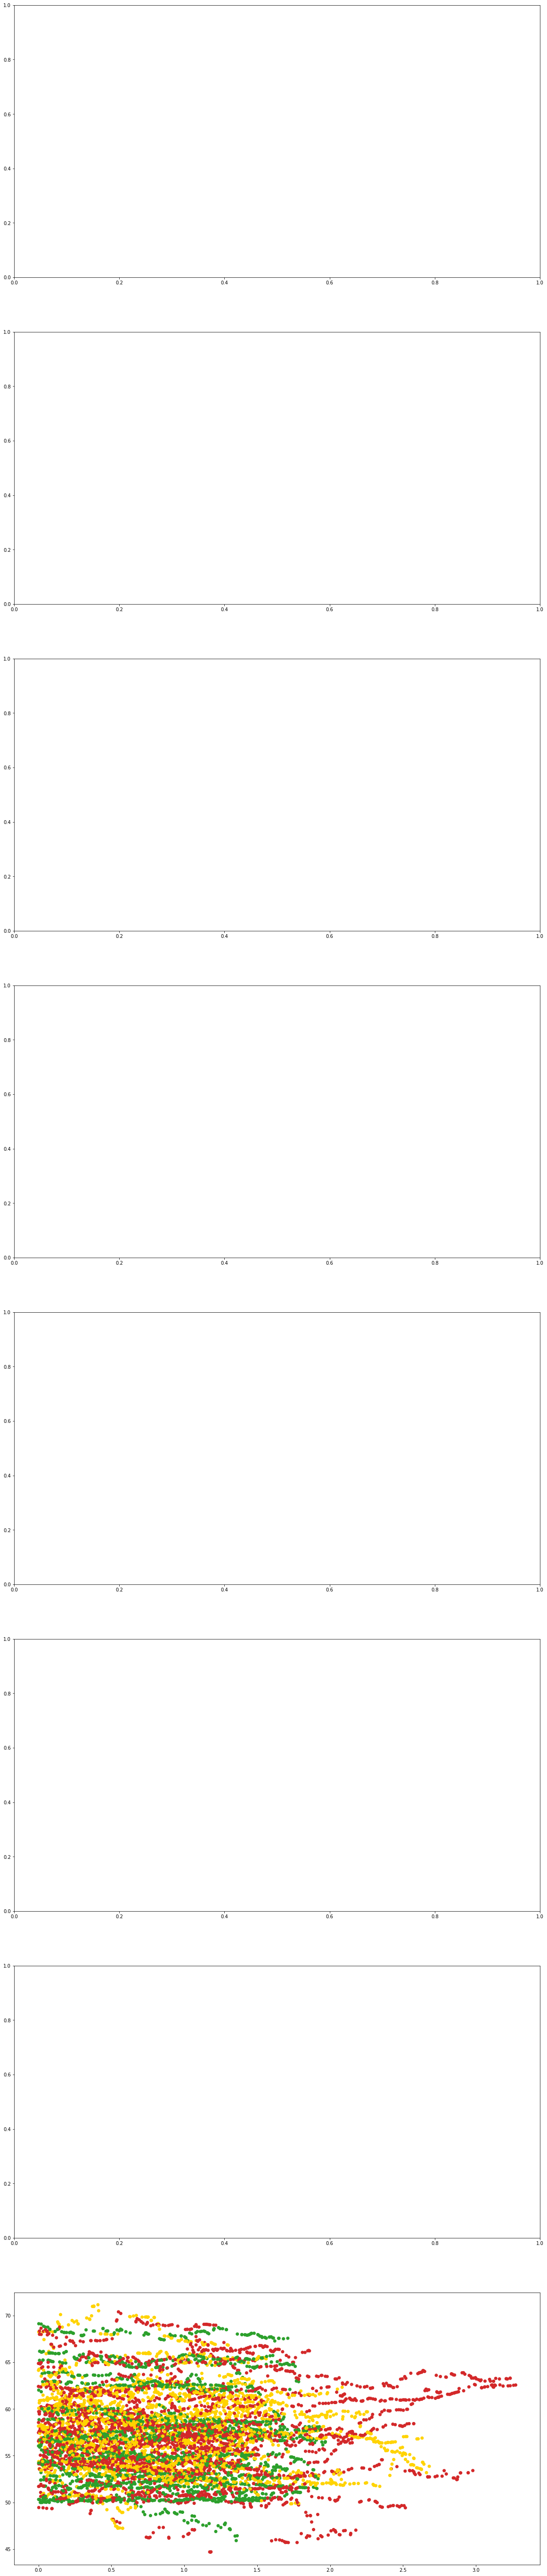

In [21]:
data_positive = data[data["Time"] > 0]
fig, axes = plt.subplots(nrows=8, ncols=1, sharex=False, sharey=False, figsize=(20, 100))
sample = data_positive.sample(10000)


plt.scatter(sample["Time"], sample["Humidity"], c=sample["Class"].map(class_colors_map))

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [23]:
model_data = data[data["Class"] != 0]

X_train, X_val, y_train, y_val = train_test_split(
    model_data.drop(["Class", "Date", "Start_Time", "Duration"], axis=1),
    model_data["Class"],
    test_size=1/3, random_state=42
)

model_data_2 = data[data["Class"] != 0]
model_data_2 = model_data_2[model_data_2["Time"] >= 0]

X_train2, X_val2, y_train2, y_val2 = train_test_split(
    model_data_2.drop(["Class", "Date", "Start_Time", "Duration"], axis=1),
    model_data_2["Class"],
    test_size=1/3, random_state=42
)

In [24]:
model = Perceptron()
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.5355522632533058

In [25]:
model = Perceptron()
model.fit(X_train2, y_train2)
model.score(X_val2, y_val2)

0.6125602403129254

In [26]:
# Logistic

model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression())
])
model.fit(X_train, y_train)
model.score(X_val, y_val)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6222129178897774

In [27]:
model.fit(X_train2, y_train2)
model.score(X_val2, y_val2)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7404533961489421

In [28]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=10))
])
model.fit(X_train, y_train)
model.score(X_val, y_val)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6221991147592274

In [29]:
model.fit(X_train2, y_train2)
model.score(X_val2, y_val2)

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7404461925240781

In [30]:
%%time
#model = Pipeline([
#    ("scaler", StandardScaler()),
#    ("model",  SVC(kernel="linear"))
#])
#model.fit(X_train, y_train)
#model.score(X_val, y_val)

CPU times: user 22 µs, sys: 2 µs, total: 24 µs
Wall time: 7.87 µs


In [31]:
%%time
#model = Pipeline([
#    ("scaler", StandardScaler()),
#    ("model",  SVC(kernel="rbf"))
#])
#model.fit(X_train, y_train)
#model.score(X_val, y_val)

CPU times: user 20 µs, sys: 2 µs, total: 22 µs
Wall time: 7.15 µs
